In [1]:
import numpy as np
from navground import sim, core
from navground.sim.ui.video import display_video, display_video_from_run, record_video_from_run
from navground.sim.notebook import display_in_notebook
import matplotlib.pyplot as plt
import networkx as nx
from navground.sim.ui.render import png_for_world
from IPython.display import Image
from shapely.geometry import LineString, Point, Polygon, MultiPolygon
from shapely.ops import unary_union
sim.load_plugins()

## Simulation without modulation

In [2]:
yaml = f"""
steps: 600
time_step: 0.1
save_directory: ''
record_pose: true
record_twist: true
record_collisions: true
record_deadlocks: true
scenario:
  type: CrowdedCorridor
  groups:
    -
      type: thymio
      number: 5
      radius: 0.4
      color: [gold,cyan]
      control_period: 0.1
      speed_tolerance: 0.02
      kinematics:
        type: 2WDiff
        wheel_axis: 0.6
        max_speed: 1.66
      behavior:
        type: HL
        optimal_speed: 1.2
        horizon: 5.0
        safety_margin: 0.1
      state_estimation:
        type: Bounded
        range: 5.0
"""
experiment = sim.load_experiment(yaml)
experiment.run()
runs = experiment.runs

In [3]:
runs[0].world.agents[0].behavior.

In [4]:
display_video_from_run(run=runs[0], factor=12.0, fps=30)

## Simulation with modulation

In [8]:
yaml = f"""
steps: 6
time_step: 0.1
save_directory: ''
record_pose: true
record_twist: true
record_collisions: true
record_deadlocks: true
scenario:
  type: CrowdedCorridor
  groups:
    -
      type: thymio
      number: 5
      radius: 0.4
      color: [gold,cyan]
      control_period: 0.1
      speed_tolerance: 0.02
      kinematics:
        type: 2WDiff
        wheel_axis: 0.6
        max_speed: 1.66
      behavior:
        type: HL
        optimal_speed: 1.2
        horizon: 5.0
        safety_margin: 0.1
        modulations:
        - type: Graphs
          enabled: true
      state_estimation:
        type: Bounded
        range: 5.0
"""
experiment = sim.load_experiment(yaml)
experiment.run()
runs = experiment.runs

In [9]:
display_video_from_run(run=runs[0], factor=12.0, fps=30)

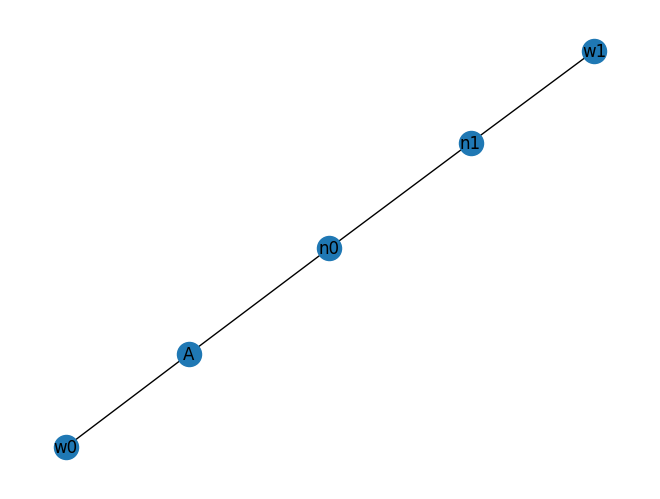

In [11]:
nx.draw(runs[0].world.agents[0].behavior.FPAG,with_labels=True)